# Example Field Trial Analysis for IndigoAg

1) Provide example of retrieving data from database using SQL  
2) Provide analysis of yield data as a function of treatment  
3) Try statistical comparisons for analytics and also a linear regression model for modeling

## SQL retrieval from tables `yield` and `sym`
New table will contain `field_id`, `sym`, `row`, `range`, `yield`, and `rep`

Example SQL script that should do the trick. Tables are assumed to be stored in database: `database`  
python script to utilize bigquery or aws redshift not written here.  
```SQL
SELECT 
      sym.*
    , yield.value AS yield
FROM database.sym AS sym
JOIN database.yield AS yield
    ON (yield.field_id = sym.field_id) AND (yield.row = sym.row) AND (yield.range = sym.range)
```

## Analysis Section:

In [1]:
from my_functions import plot_stat_summary as pss

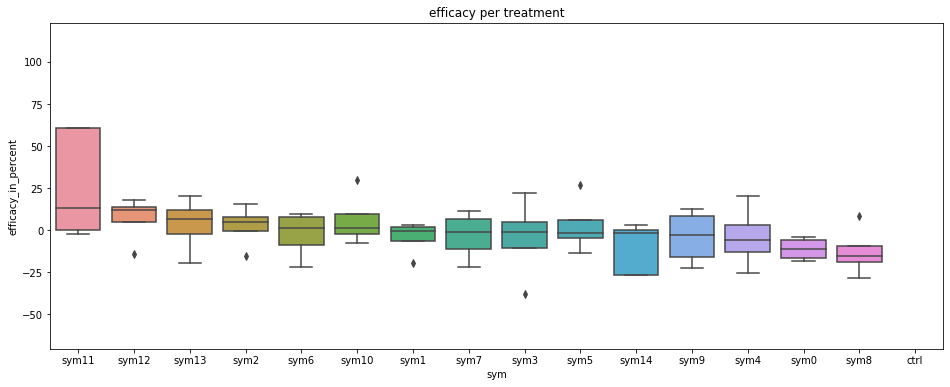

In [2]:
stats_by_row, stats_by_treatment, df = pss('field.csv')

## Linear Regression Model:
This model runs on efficacy which is the relative difference of the yield of the treated plot vs the yield of the control plot

In [3]:
from my_functions import linearRegression as lr

features in order of decreasing value of coeficients:
feature: coefficient value; target:  efficacy_in_percent
--------------------------
sym_sym11 :  64.6275026103395
sym_sym10 :  11.4021714519765
sym_sym12 :  3.7817299678968688
sym_sym5 :  3.1590283419505854
sym_sym6 :  3.067865132368728
sym_sym13 :  1.9235474780013457
sym_sym2 :  -1.1726199571579483
sym_sym7 :  -2.467688987266855
sym_sym4 :  -5.366939075992242
sym_sym1 :  -5.53696560890793
sym_sym0 :  -8.371440990145912
sym_sym9 :  -9.075884878157435
sym_sym8 :  -11.147118822481655
sym_sym3 :  -12.852043168075866
sym_sym14 :  -31.971143494347686


--------------------------------------
rmse_for_cross_val_four_times:  33.18
--------------------------------------



Comparing predicted vs truth value in dataset
---------------------------------------------------------


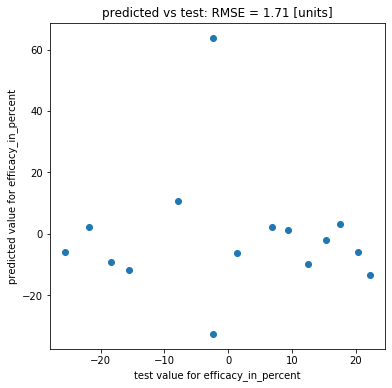

In [4]:
# Default model parameters:
# This model predicts un-normalized efficacy
model_default = lr(df)

In [5]:
# Set optional model parameters for testing other configurations:
# These example parameters predict un-normalized `yield` with plot position excluded.
# all models drop the control column.
efficacy = False
normalize = False
include_position = False
testsize = 0.25

features in order of decreasing value of coeficients:
feature: coefficient value; target:  value
--------------------------
sym_sym11 :  56.282840064517806
sym_sym13 :  13.750967171662362
sym_sym12 :  7.862535899526561
sym_sym10 :  7.707790829316936
sym_sym5 :  7.241304188035901
sym_sym7 :  6.743567345469858
sym_sym9 :  0.44084672018677923
sym_sym4 :  -0.6867217920663575
sym_sym6 :  -3.680463180379074
sym_sym1 :  -4.455722270164982
sym_sym8 :  -9.550288154969692
sym_sym0 :  -10.464278320851333
sym_sym3 :  -13.995454135667863
sym_sym2 :  -15.89428500753051
sym_sym14 :  -41.302639357086406


--------------------------------------
rmse_for_cross_val_four_times:  37.43
--------------------------------------



Comparing predicted vs truth value in dataset
---------------------------------------------------------


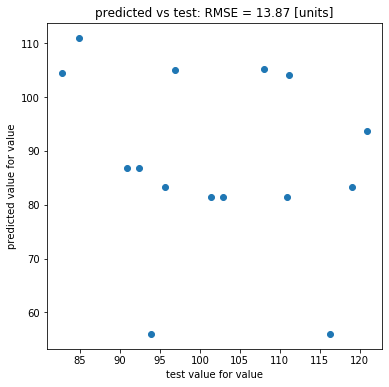

In [6]:
model_modified = lr(df,efficacy=efficacy,normalize=normalize,include_position=include_position,testsize=testsize)

## A few words:
I think efficacy seems to produce the better model (also noted by the rmse after cross validation). Although, there are a lot of configurations that can be tested to understand what might produce the best results. Normalized vs. not normalized, including field position or not, etc. Correlations were not explored in this analysis, mainly because for the ideal model, only treatment is an input parameter and is expected to be independent. For models where yield is the target, and where field_position is used as an input, correlation would need to be accounted for. In the two scenarios above, correlation is expected to be minimal and is not accounted for.

The model is a bit confusing to interpret, but the most valuable insight appears to be that `sym_11` is the most efficacious while `sym_14` is least efficacious.

_Author_: Kyle W. Dawson  
_Date_:   15-Aug-2015  
_Email_: kyle.dawson323@gmail.com or drkylewdawson@gmail.com